## <center> Support Vector Machines (SVMs) in scikit-learn </center>

- for classification and regression (SVCs, SVRs)
- can be applied on linear and non-linear data
- look for the best separating line or decision boundary
- look for the largest margin 

![](SVM.png)

![](SVM2.png)

![](SVM3.png)

### Commonly used kernels:

- linear
- polynomial
- radial basis function (RBF) - Gaussian RBF
- sigmoid
- etc.

In [41]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


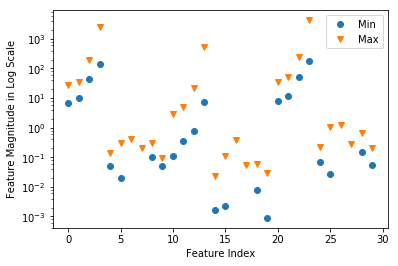

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [43]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum per feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [44]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.948
The accuracy on the test subset: 0.951


In [46]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


## <center> Advantages and Disadvantages of SVMs (scikit-learn) </center>

### Stronger points:
 - they are versatile
 - can build complex decision boundaries on low-dimensional data
 - can work well on high-dimensional data with relatively small sample size
 - etc.

 
### Weaker points:
 - don't perform well on high-dimensional data with many samples (i.e. > 100k)
 - preprocessing may be required => implies knowledge and understanding of hyper-parameters
 - harder to inspect and visualize
 - etc.
 
 
### Alternatives:
 
 - DT and Random Forests (require less/no preprocessing of data, easier to understand, inspect, and visualize)
 
### Good practices: 
- data scaling
- other pre-processing
- choosing an appropriate kernel
- tuning hyper-parameters: C, gamma, etc. 

## <center> Uncertainty Estimation </center>

### The Decision Function

In [47]:
print('The decision function is:\n\n{}'.format(svm.decision_function(X_test_scaled[:20])))

The decision function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]


In [48]:
print('Thresholded decision function:\n\n{}'.format(svm.decision_function(X_test_scaled[:20])>0))

Thresholded decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [49]:
svm.classes_

array([0, 1])

### Predicting Probabilities

In [50]:
svm

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, y_train)

print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(svm.predict_proba(X_test_scaled[:20])))

Predicted probabilities for the samples (malignant and bening):

[[  9.98651583e-01   1.34841680e-03]
 [  6.08180786e-02   9.39181921e-01]
 [  6.10296274e-03   9.93897037e-01]
 [  4.23504324e-02   9.57649568e-01]
 [  4.49574968e-06   9.99995504e-01]
 [  9.63638523e-03   9.90363615e-01]
 [  7.22394380e-07   9.99999278e-01]
 [  6.68308689e-03   9.93316913e-01]
 [  2.60447113e-03   9.97395529e-01]
 [  3.03461599e-09   9.99999997e-01]
 [  1.92939932e-01   8.07060068e-01]
 [  7.44383481e-02   9.25561652e-01]
 [  4.84594951e-08   9.99999952e-01]
 [  4.32337544e-01   5.67662456e-01]
 [  2.52489416e-01   7.47510584e-01]
 [  9.95113265e-01   4.88673546e-03]
 [  9.93213151e-03   9.90067868e-01]
 [  9.99987314e-01   1.26864309e-05]
 [  9.99946208e-01   5.37920317e-05]
 [  9.99999900e-01   1.00000010e-07]]


In [52]:
svm.predict(X_test_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0])